# Projeto TSE - São José dos Campos

**Desenvolvimento: Toni William do Prado**

# Requisitos

Este projeto teve como idéia capturar dados disponibilizado pelo TSE e IBGE para responder algumas perguntas relacionadas às eleições de 2022 em São José dos Campos.

- 01 Jornalista quer saber a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária, além da quantidade de eleitores que utilizam nome social 	
- 02 Jornalista quer relacionar as características do eleitorado de acordo com o representante eleito em determinada região 
- 03 Jornalista quer saber a renda média do eleitorado de determinada região 	
- 04 Jornalista quer saber, daquela região, a cidade com mais eleitores jovem e mais eleitores idosos 	
- 05 Jornalista quer comparar a renda média de eleitores do Vale do Paraíba com a de outras regiões do Estado 	
- 06 Jornalista quer automatizar a exportação das estatísticas 	
- 07 Jornalista quer poder relacionar características do eleitorado de acordo com o representante eleito em determinada região de eleições futuras 	
- 08 Jornalista quer saber a percentagem de eleitores ausentes da última eleição 	
- 09 Jornalista quer saber a evolução do número de eleitores 	
- 10 Jornalista quer a análise de dados feita em Jupyter Notebook 

Foi utilizado arquivos .csv para a leitura e captção dos dados disponibilizados.
- aptos_abstencao_2022
    - Utilizado para obtenção dos eleitores ausentes
- cadastro_central_de_empresas_SJC
    - Utilizado para obtenção da média salarial dos anos de 2017 até 2021
- evolucao_eleitorado_2022_SJC
    - Utilizado para obtenção da alteração dos números de eleitores
- perfil_eleitor_2022_SP
    - Utiliado para obtenção da classificação dos eleitores (Gênero, Idade, Escolaridade, Nome Social)
    
Foi utilizado o Jupyter Notebook para o desenvolvimento e as bibliotecas pandas, para análise dos dados, e matplotlib para gerar gráficos.

In [1]:
# Importa bibliotecas de análise de dados
import pandas as pd

# Importa biblioteca de geração de gráficos
import matplotlib.pyplot as plt

# Importa biblioteca para manipular diretório
import os
from os import walk

In [2]:
# Determinando quais colunas serão lidas dos .csv

col_eleitorado = ["NM_MUNICIPIO", "DS_GENERO", "DS_ESTADO_CIVIL", "DS_FAIXA_ETARIA", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL",
                  "QT_ELEITORES_DEFICIENCIA", "QT_ELEITORES_INC_NM_SOCIAL"]

col_abstencao = ["Cargo", "Município", "Quantidade de aptos", "Quantidade de abstenções"]

col_evolucao = ["nr_ano", "nr_mes", "nm_mes", "qt_eleitor", "qt_eleitor_deficiencia", "qt_eleitor_inc_nm_social"]

col_salario_medio = ["Indicador", "2017", "2018", "2019", "2020", "2021"]

In [3]:
# Carrega o DataFrame do eleitorado
filename_eleitorado = f'./data/perfil_eleitor_2022_SP.csv'

# Carrega o DataFrame da abstenção de eleitores
filename_abstencao = f'./data/aptos_abstencao_2022.csv'

# Carrega o Dataframe da evolução dos eleitores
filename_evolucao = f'./data/evolucao_eleitorado_2022_SJC.csv'

# Carrega o Dataframe do IBGE salário médio
filename_salario_medio = f'./data/cadastro_central_de_empresas_SJC.csv'

In [4]:
# DataFrame do eleitorado
dfe = pd.read_csv(filename_eleitorado, usecols=col_eleitorado, sep=';', encoding='iso-8859-1')

# DataFrame da abstenção de eleitores
dfa = pd.read_csv(filename_abstencao, usecols=col_abstencao, sep=';', encoding='iso-8859-1')

# Dataframe da evolução da quantidade de eleitores
dfev = pd.read_csv(filename_evolucao, usecols=col_evolucao, sep=';', encoding='iso-8859-1')

# Dataframe do salário médio
dfs = pd.read_csv(filename_salario_medio, usecols=col_salario_medio, sep= ';')

Estado civil dos eleitores de São José dos Campos



DS_ESTADO_CIVIL
CASADO                    251017
DIVORCIADO                 34694
NÃO INFORMADO                 16
SEPARADO JUDICIALMENTE      8836
SOLTEIRO                  246174
VIÚVO                      17403
Name: QT_ELEITORES_PERFIL, dtype: int64

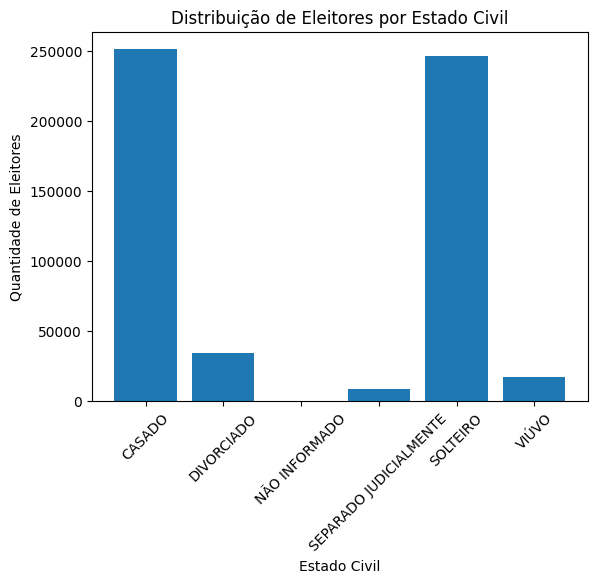

In [5]:
# ESTADO CIVIL

# Filtrar os dados para obter apenas as linhas com NM_MUNICIPIO igual a "SÃO JOSÉ DOS CAMPOS"
sjc = dfe[dfe['NM_MUNICIPIO'] == 'SÃO JOSÉ DOS CAMPOS']

# Agrupar os dados pela coluna DS_ESTADO_CIVIL e somar os valores da coluna QT_ELEITORES_PERFIL
estado_civil = sjc.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum()

# Imprimir o resultado
print("Estado civil dos eleitores de São José dos Campos\n")
display(estado_civil)
print()

# Plotando o gráfico de barras
plt.bar(estado_civil.index, estado_civil.values)
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de Eleitores')
plt.title('Distribuição de Eleitores por Estado Civil')
plt.xticks(rotation=45)
plt.show()

Escolaridade dos eleitores de São José dos Campos



DS_GRAU_ESCOLARIDADE
ANALFABETO                         7056
ENSINO FUNDAMENTAL COMPLETO       37115
ENSINO FUNDAMENTAL INCOMPLETO     77682
ENSINO MÉDIO COMPLETO            212650
ENSINO MÉDIO INCOMPLETO           59022
LÊ E ESCREVE                      10652
SUPERIOR COMPLETO                117731
SUPERIOR INCOMPLETO               36232
Name: QT_ELEITORES_PERFIL, dtype: int64

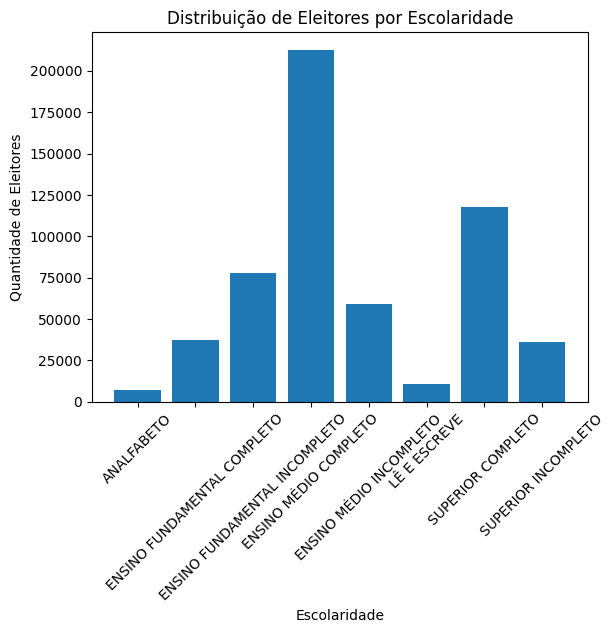

In [6]:
# ESCOLARIDADE

# Agrupar os dados pela coluna DS_GRAU_ESCOLARIDADE e somar os valores da coluna QT_ELEITORES_PERFIL
escolaridade = sjc.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum()

# Imprimir o resultado
print("Escolaridade dos eleitores de São José dos Campos\n")
display(escolaridade)
print()

# Plotando o gráfico de barras
plt.bar(escolaridade.index, escolaridade.values)
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de Eleitores')
plt.title('Distribuição de Eleitores por Escolaridade')
plt.xticks(rotation=45)
plt.show()

Faixa etária dos eleitores de São José dos Campos



DS_FAIXA_ETARIA
100 anos ou mais                    582
16 anos                            2015
17 anos                            3397
18 anos                            6819
19 anos                            7581
20 anos                            8460
21 a 24 anos                      40614
25 a 29 anos                      52650
30 a 34 anos                      55945
35 a 39 anos                      59645
40 a 44 anos                      61178
45 a 49 anos                      51318
50 a 54 anos                      45963
55 a 59 anos                      42963
60 a 64 anos                      37424
65 a 69 anos                      30892
70 a 74 anos                      21989
75 a 79 anos                      13418
80 a 84 anos                       7475
85 a 89 anos                       4037
90 a 94 anos                       2277
95 a 99 anos                       1496
Inválido                              2
Name: QT_ELEITORES_PERFIL, dtype: int64

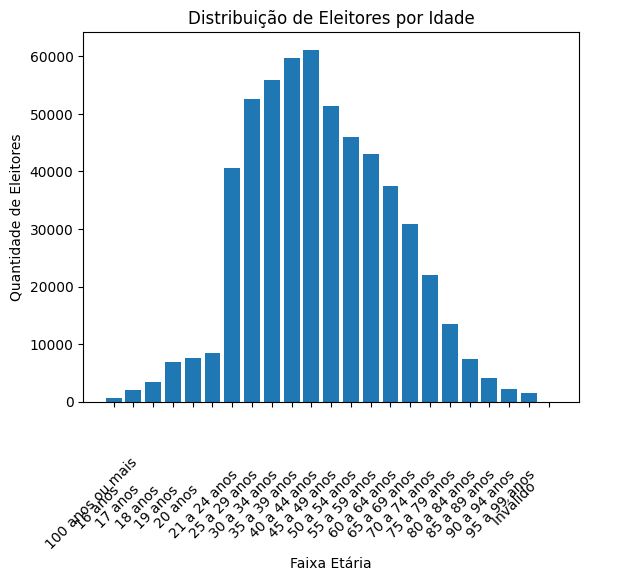

In [7]:
# FAIXA ETÁRIA

# Agrupar os dados pela coluna DS_FAIXA_ETARIA e somar os valores da coluna QT_ELEITORES_PERFIL
faixa_etaria = sjc.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()

# Imprimir o resultado
print("Faixa etária dos eleitores de São José dos Campos\n")
display(faixa_etaria)
print()

# Plotando o gráfico de barras
plt.bar(faixa_etaria.index, faixa_etaria.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Eleitores')
plt.title('Distribuição de Eleitores por Idade')
plt.xticks(rotation=45)
plt.show()

Gênero dos eleitores de São José dos Campos



DS_GENERO
FEMININO         294569
MASCULINO        263551
NÃO INFORMADO        20
Name: QT_ELEITORES_PERFIL, dtype: int64

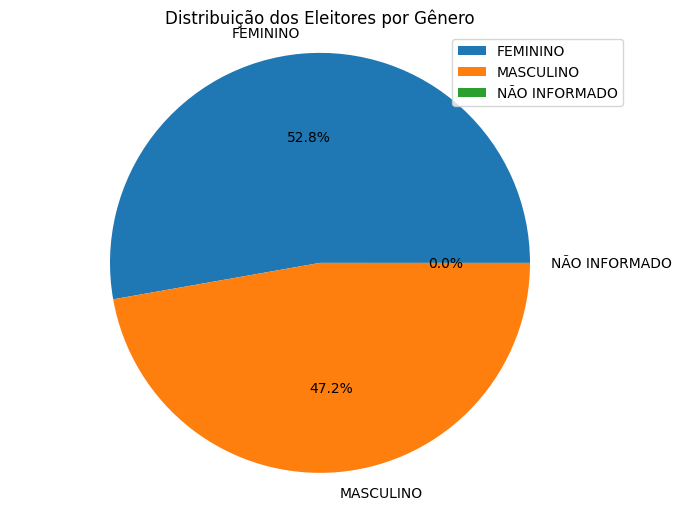

In [8]:
# GÊNERO

# Agrupar os dados pela coluna DS_GENERO e somar os valores da coluna QT_ELEITORES_PERFIL
genero = sjc.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum()

# Imprimir o resultado
print("Gênero dos eleitores de São José dos Campos\n")
display(genero)
print()

# Gerar o gráfico de pizza
plt.figure(figsize=(8, 6))
genero.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('')
plt.title('Distribuição dos Eleitores por Gênero')
plt.legend()
plt.show()

In [9]:
# NOME SOCIAL

# Agrupar os dados pela coluna QT_ELEITORES_INC_NM_SOCIAL e somar os valores da coluna QT_ELEITORES_PERFIL
nome_social = sjc.groupby('QT_ELEITORES_INC_NM_SOCIAL')['QT_ELEITORES_PERFIL'].sum()

# Imprimir o resultado
print("Quantiade de eleitores com nome social em São José dos Campos\n")
display(nome_social)
print()

Quantiade de eleitores com nome social em São José dos Campos



QT_ELEITORES_INC_NM_SOCIAL
0    557644
1       496
Name: QT_ELEITORES_PERFIL, dtype: int64

In [10]:
# ELEITORES JOVENS E IDOSOS
# Filtrar os dados com as idades dos Jovens e Idosos

# Segundo IBGE, Jovens têm idade 15 - 29 anos
dados_filtrados_jovens = dfe[(dfe['NM_MUNICIPIO'] == 'SÃO JOSÉ DOS CAMPOS') & (dfe['DS_FAIXA_ETARIA'].astype(str).str.startswith(('16', '17', '18', '19', '20', '21', '25')))]
# Calcular a soma do total Jovens
soma_total_jovens = dados_filtrados_jovens['QT_ELEITORES_PERFIL'].sum()
# Imprimir o resultado
print("Quantidade de jovens eleitores em São José dos Campos\n")
print("Segundo IBGE, jovens são pessoas de 15 - 29 anos")
print('Jovens:', soma_total_jovens)
print("\n")

# Segundo IBGE, Idosos têm idade a partir de 65 anos
dados_filtrados_idosos = dfe[(dfe['NM_MUNICIPIO'] == 'SÃO JOSÉ DOS CAMPOS') & (dfe['DS_FAIXA_ETARIA'].astype(str).str.startswith(('65', '70', '75', '80', '85', '90', '95', '100')))]
# Calcular a soma do total Idosos
soma_total_idosos = dados_filtrados_idosos['QT_ELEITORES_PERFIL'].sum()
# Imprimir o resultado
print("Quantidade de eleitores idosos em São José dos Campos\n")
print("Segundo IBGE, idosos são pessoas a partir de 65 anos")
print('Idosos:', soma_total_idosos)
print()

# Criação do DataFrame
data = {'Jovens': [soma_total_jovens], 'Idosos': [soma_total_idosos]}
df = pd.DataFrame(data)

# Exibição do DataFrame
print(df)

Quantidade de jovens eleitores em São José dos Campos

Segundo IBGE, jovens são pessoas de 15 - 29 anos
Jovens: 121536


Quantidade de eleitores idosos em São José dos Campos

Segundo IBGE, idosos são pessoas a partir de 65 anos
Idosos: 82166

   Jovens  Idosos
0  121536   82166


,Cargo,Município,Quantidade de aptos,Quantidade de abstenções
4649,Deputado Estadual,SÃO JOSÉ DOS CAMPOS,557556,111451
9946,Deputado Federal,SÃO JOSÉ DOS CAMPOS,557556,111451
15243,Governador,SÃO JOSÉ DOS CAMPOS,1115218,219649
20684,Presidente,SÃO JOSÉ DOS CAMPOS,1117753,219823
26006,Senador,SÃO JOSÉ DOS CAMPOS,557556,111451


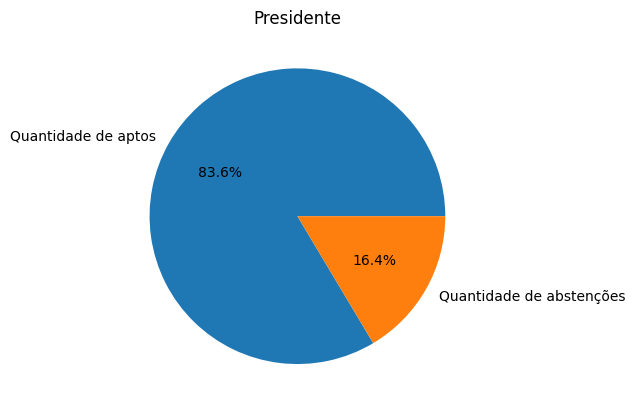

In [11]:
# ELEITORES AUSENTES

# Filtrar os dados para selecionar apenas as linhas com 'Município' igual a 'Ubatuba'
municipio = dfa.loc[dfa['Município'] == 'SÃO JOSÉ DOS CAMPOS']

# Exibir os valores recuperados
display(municipio)

# Filtrar as informações com base no valor 'Presidente' na coluna 'Cargo'
df_presidente = municipio[municipio['Cargo'] == 'Presidente']

# Obter os valores das colunas 'Quantidade de aptos' e 'Quantidade de abstenções'
quantidade_aptos = df_presidente['Quantidade de aptos'].values[0]
quantidade_abstencoes = df_presidente['Quantidade de abstenções'].values[0]

# Criar uma lista com os valores
valores = [quantidade_aptos, quantidade_abstencoes]

# Criar uma lista com os rótulos para o gráfico de pizza
rotulos = ['Quantidade de aptos', 'Quantidade de abstenções']

# Criar o gráfico de pizza
plt.pie(valores, labels=rotulos, autopct='%1.1f%%')

# Adicionar título ao gráfico
plt.title('Presidente')

# Exibir o gráfico
plt.show()

In [12]:
# Evolução do número de eleitores

# Filtrando os dados de 2022 e 2023
filtro = dfev['nr_ano'].isin([2022, 2023])
dados_filtrados = dfev[filtro]

# Ordenando os dados filtrados
dados_ordenados = dados_filtrados.sort_values(['nr_ano', 'nr_mes'], ascending=[False, False])

# Selecionando as colunas desejadas
dados_selecionados = dados_ordenados[['nr_ano', 'nr_mes', 'nm_mes', 'qt_eleitor', 'qt_eleitor_deficiencia', 'qt_eleitor_inc_nm_social']]

# Exibindo o resultado
display(dados_selecionados)


,nr_ano,nr_mes,nm_mes,qt_eleitor,qt_eleitor_deficiencia,qt_eleitor_inc_nm_social
0,2023,5,Maio,558825,5596,130
1,2023,4,Abril,558588,0,128
2,2023,3,Março,558537,5598,124
3,2023,2,Fevereiro,558245,5595,124
4,2023,1,Janeiro,557860,5597,125
5,2022,12,Dezembro,557348,5588,124
6,2022,11,Novembro,557170,5568,124
7,2022,10,Outubro,558140,5607,121
8,2022,9,Setembro,558140,5605,121
9,2022,8,Agosto,558140,5604,121


In [13]:
# Salário médio

indicador = 'Salário médio mensal'
colunas_interesse = ['Indicador', '2017', '2018', '2019', '2020', '2021']
dados_interesse = dfs.loc[dfs['Indicador'] == indicador, colunas_interesse]

display(dados_interesse)

,Indicador,2017,2018,2019,2020,2021
67,Salário médio mensal,3.7,3.7,3.5,3.3,3.4


In [14]:
# Ligar ou desligar a opção de exportar resultados das análises como .csv 
exportar_csv = 1     # [0 - NÃO / 1 - SIM]
export_dir = r'./exportedcsv'
# Gera o .csv de cada análise

if exportar_csv == 1:
    # 0. Checa se a pasta onde serão exportados os .csv existe, caso não, ela é criada
    if os.path.isdir(export_dir) == False:
        os.mkdir(export_dir)
    
    
    # 1. Estado civil dos eleitores de São José dos Campos
    estado_civil.to_csv(export_dir+'/01_EstadoCivil.csv', sep=';', encoding='iso-8859-1', index=False)
    
    # 2. Escolaridade dos eleitores de São José dos Campos
    escolaridade.to_csv(export_dir+'/02_Escolaridade.csv', sep=';', encoding='iso-8859-1', index=False)
    
    # 3. Faixa etária dos eleitores de São José dos Campos
    faixa_etaria.to_csv(export_dir+'/03_FaixaEtaria.csv', sep=';', encoding='iso-8859-1', index=False)
    
    # 4. Gênero dos eleitores de São José dos Campos
    genero.to_csv(export_dir+'/04_Genero.csv', sep=';', encoding='iso-8859-1', index=False)
     
     # 5. Quantidade dos eleitores de São José dos Campos que usam nome social
    nome_social.to_csv(export_dir+'/05_NomeSocial.csv', sep=';', encoding='iso-8859-1', index=False)
    
    # 6. Quantidade de eleitores jovens e idosos em São José dos Campos
    df.to_csv(export_dir+'/06_JovensIdosos.csv', sep=';', encoding='iso-8859-1', index=False)
    
    # 7. Quantidade de eleitores ausentes na eleição de 2022 em São José dos Campos
    municipio.to_csv(export_dir+'/07_Ausentes.csv', sep=';', encoding='iso-8859-1', index=False)
    
    # 8. Evolução dos eleitores desde janeiro de 2022 até maio de 2023 em São José dos Campos
    dados_selecionados.to_csv(export_dir+'/08_Evolução.csv', sep=';', index=False)
    
    # 9. Salário médio de 2017 a 2021 em São José dos Campos
    dados_interesse.to_csv(export_dir+'/09_SalarioMedio.csv', encoding='iso-8859-1', index=False)
    
    